In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\Datasets\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [6]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Filling the missing columns 

In [9]:
from sklearn.impute import SimpleImputer


#fill age with mean
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
mean_imputer = mean_imputer.fit(df[["Age"]])
df.Age = mean_imputer.transform(df[["Age"]]).ravel()

# filling the Embarked column with the mode 
mode_imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
mode_imputer = mode_imputer.fit(df[["Embarked"]])
df.Embarked = mode_imputer.transform(df[["Embarked"]]).ravel()

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
# percentage of missing value in the cabin column

df.Cabin.isnull().sum() / len(df) * 100

77.10437710437711

### The percentage of missing valur in the cabin column is 77, it will be wise to drop the column

In [12]:
df.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [13]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [14]:
# deleting unwanted columns
unwanted_columns = ["Ticket", "Cabin", "Name", "PassengerId"]

for cols in unwanted_columns:
    df.drop(cols, axis = 1, inplace = True)
   

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Text(0.5, 1.0, 'Pclass and Fare comparison')

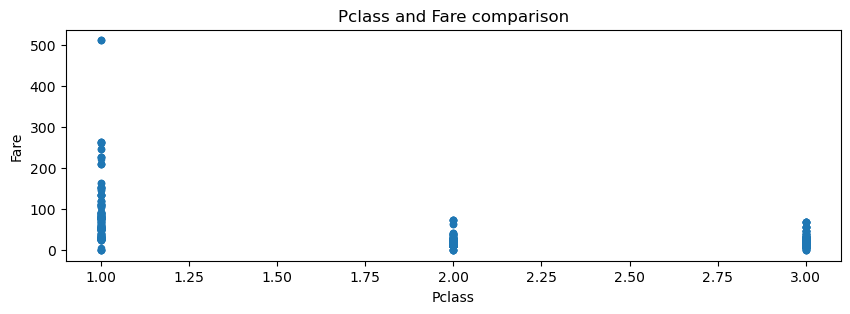

In [29]:
df.plot(x = "Pclass", y = "Fare", kind= "scatter", figsize = (10,3))
plt.title("Pclass and Fare comparison")

Text(0.5, 0, 'Survival')

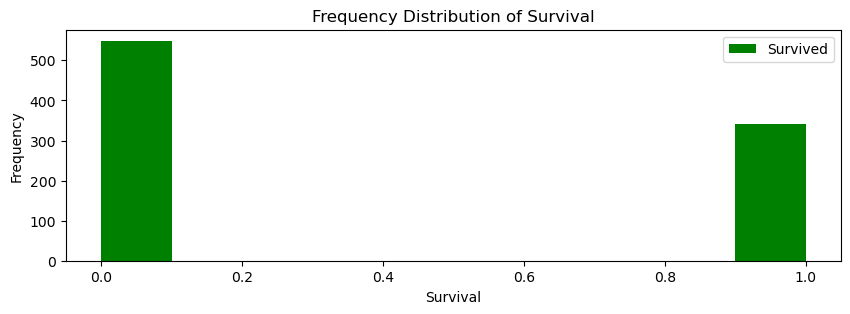

In [24]:
df.plot.hist( y= "Survived", color= "green", figsize = (10,3))
plt.title("Frequency Distribution of Survival" )
plt.xlabel("Survival")


In [25]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

Text(0.5, 0, 'Age')

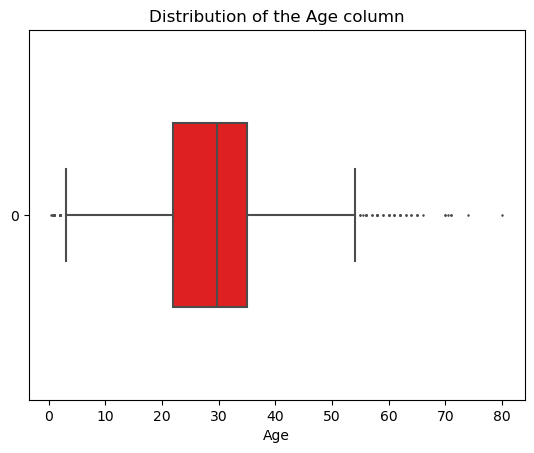

In [28]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


# Outliers detection

Text(0.5, 1.0, 'Fare and Age comparison')

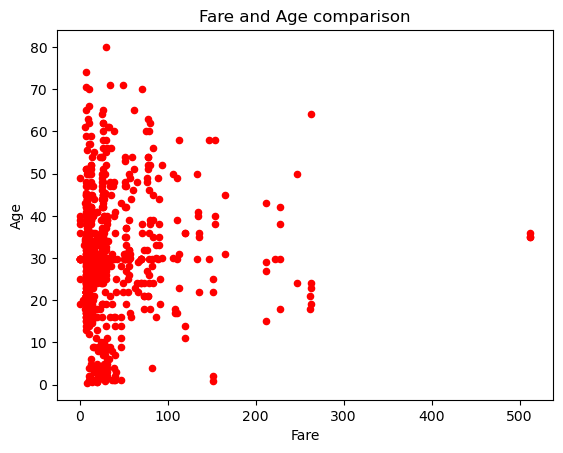

In [39]:
df.plot.scatter(x = "Fare", y = "Age", color = "red") # to check for outliers
plt.title("Fare and Age comparison")

Text(0.5, 0, 'Age')

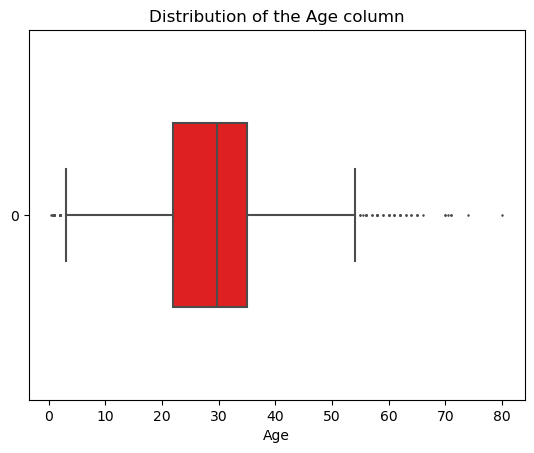

In [45]:
sns.boxplot(df.Age, width = 0.5, fliersize= 0.9, orient= "h", color= "red")
plt.title("Distribution of the Age column")
plt.xlabel("Age")

Text(0.5, 0, 'Fare')

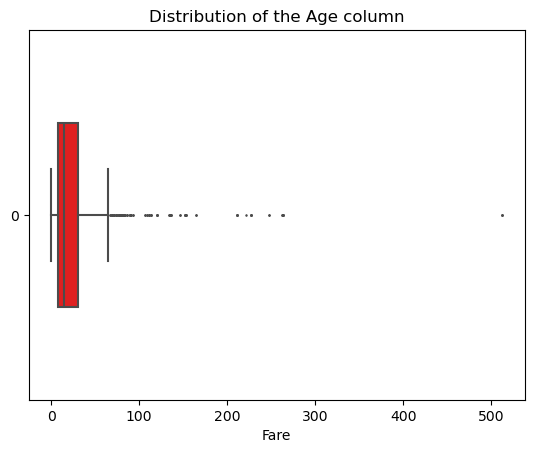

In [46]:
sns.boxplot(df.Fare, width = 0.5, fliersize= 0.9, orient= "h", color= "red")
plt.title("Distribution of the Age column")
plt.xlabel("Fare")